In [38]:
import tensorflow as tf
import IPython.display as display
import os
import imghdr
import glob
import tensorflow.keras as keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


Example image:

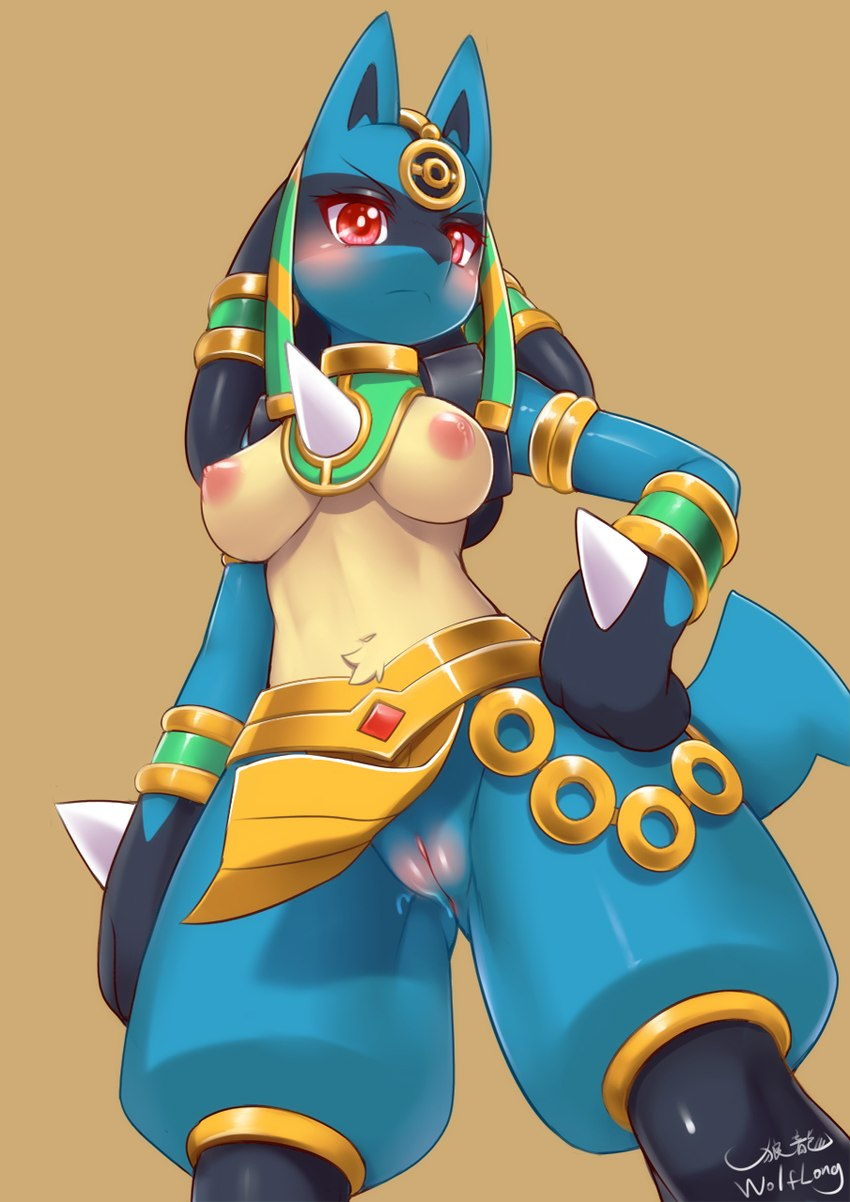

In [9]:
image_path = "./horny_pics/wolflong/wolflong_post_3232856.jpg"
display.display(display.Image(image_path))

In [12]:
img_raw = tf.io.read_file(image_path)
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(1202, 850, 3)
<dtype: 'uint8'>


In [17]:
img_final = tf.image.resize(img_tensor, [512, 512])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(512, 512, 3)
0.0
1.0


Text(0.5, 1.0, './horny_pics/wolflong/wolflong_post_3232856.jpg')

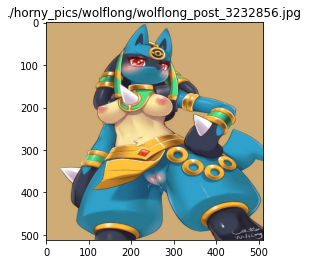

In [19]:
import matplotlib.pyplot as plt
plt.imshow(img_final)
plt.title(image_path)

Make a handy function for pre-pro.

In [20]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [512,512])
  image /= 255.0  # normalize to [0,1] range

  return image

In [21]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

Let's see some example by using the pre-pro, here we will be only using 10 from each artist,
but before that, we have some broken image file(Flash were no longer supported, and it will break the code)

In [77]:
import PIL


from PIL import Image
from PIL import UnidentifiedImageError

try:
    gif = Image.open('horny_pics\wolflong\wolflong_post_1344567.jpg')
except PIL.UnidentifiedImageError:
    print("This was a flash file.")
else:
    print("JPG file.")

# make it into a function

def broken_jpg(img_path):
    """
    img_path: it takes an image path, read it and checking the type
    Return True if it is broken.
    """
    try:
        gif = Image.open(img_path)
    except PIL.UnidentifiedImageError:
        return True
    else:
        # check if the img is a gif converted to jpg
        try:
            gif.seek(1)
        except EOFError:
            return False
        else:
            return True
        return False



This was a flash file.


In [78]:
rootdir =  os.path.dirname(os.path.abspath("ANN_Example.ipynb"))
print("This is the roodir: ", rootdir)


file_list = []

for subdir, dirs, files in os.walk(rootdir):
    lim = 0
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file
        # skip the broken file
        if broken_jpg(filepath):
            continue
        else:
                    # we only want 10 from each
            if lim == 10:
                break

            if filepath.endswith(".jpg"):
                print(filepath)
                file_list.append(filepath)
                lim +=1
print(file_list )

This is the roodir:  S:\E621\E621_ANN
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_106588.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1108218.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1116672.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1124348.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1212250.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1212260.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1212264.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1213324.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_121661.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1250236.jpg
S:\E621\E621_ANN\horny_pics\wolflong\wolflong_post_1001846.jpg
S:\E621\E621_ANN\horny_pics\wolflong\wolflong_post_1005914.jpg
S:\E621\E621_ANN\horny_pics\wolflong\wolflong_post_1005917.jpg
S:\E621\E621_ANN\horny_pics\wolflong\wolflong_post_1023560.jpg
S:\E621\E621_ANN\horny_pics\wolflong\wolflong_post_1043252.jpg
S:\E621\E621_ANN\horny_pics\wolflong\wo

In [82]:
# This cell is for debug
# S:\E621\E621_ANN\horny_pics\wolflong\wolflong_post_1032879.jpg
# this image has issue, will break the following code
# InvalidArgumentError: Got 6 frames, but animated gifs can only be decoded by tf.io.decode_gif or tf.io.decode_image [Op:DecodeJpeg]
# fixed by using broken_jpg()


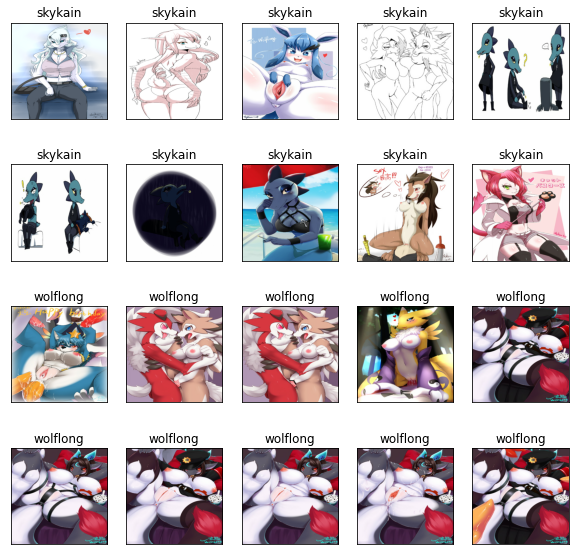

In [87]:
plt.figure(figsize=(10,10))
for i in range(20):
    img_path = file_list[i]
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.imshow(load_and_preprocess_image(img_path))
    #print(img_path.split(sep="\\"))
    plt.title(img_path.split(sep="\\")[-2])

plt.show()